## Introduction
This project explores the global video game sales market up until 2024, analyzing performance trends across multiple regions, platforms, and genres. The dataset captures key metrics such as sales volumes, platforms, genres, and regional distribution, providing insights into consumers' preferences. While the dataset covers the broader gaming industry, the primary focus is on sales performance for PlayStation 4 (PS4) and Xbox One (XOne) consoles.

## Data Source
- ```Video Game Sales 24.csv```
- [Kaggle Dataset Link](https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024)

## Goals
- What are the top 10 Video Game Sales based on critic score?
- What are the top-selling game genres for PS4 and XOne globally?
- Which region contributes the most to global sales?
- Which year saw the highest and lowest sales volumes?

## Note
The dataset for the XOne is considerably smaller compared to that of the PS4, which may introduce bias into the analysis. Given the limited representation of XOne titles and the insufficient data to support a robust comparative study, the subsequent analysis after popular genre in this project will focus exclusively on PS4 games.

### Getting Started
Import librarys that will be used within the project.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

### Loading the Data
The provided dataset is loaded into ```game_sales``` DataFrame:

In [2]:
game_sales = pd.read_csv('Video Game Sales 24.csv')
game_sales.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


### Exploring the DataFrame
Within the given dataset we can observe the following columns:

`img` `title` `console` `genre` `publisher` `developer` `critic_score` `total_sales` `na_sales` `jp_sales` `pal_sales` `other_sales` `release_date` `last_update`

After exploring the column name and variables I will be:
- Dropping unnecessary columns
- Renaming any columns for clear understanding of the values
- Creating a new dataframe consisting of only PS4 and XOne sales
- Filtering, cleaning, and udpating neccesary data

In [3]:
#dropping unwanted columns like img and last update
game_sales = game_sales.drop(['img'], axis=1)

In [4]:
game_sales.rename(columns = {
    'na_sales' : 'north_america',
    'jp_sales' : 'japan',
    'pal_sales' : 'ea'
}, inplace = True)

game_sales[['year', 'month', 'date']] = game_sales.release_date.str.split('-',expand = True)
game_sales.head()

,title,console,genre,publisher,developer,critic_score,total_sales,north_america,japan,ea,other_sales,release_date,last_update,year,month,date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN,2013,09,17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,2014,11,18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN,2002,10,28
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN,2013,09,17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14,2015,11,06


In [5]:
#filtering data to only ps4 and XOne game sales
psx_game_sales = game_sales[game_sales['console'].isin(["PS4","XOne"])].reset_index(drop = True)

In [6]:
#filtering out null,na,empty values
psx_game_sales = psx_game_sales.dropna(subset = ['total_sales', 'north_america', 'japan', 'ea', 'other_sales', 'year'])

#checking datatypes and updating datatype as needed 
psx_game_sales['year'] = pd.to_numeric(psx_game_sales['year'], errors= 'coerce')
psx_game_sales['year'] = psx_game_sales['year'].astype(int)

psx_game_sales.isnull().sum()
#len(ps4_game_sales)

title              0
console            0
genre              0
publisher          0
developer          0
critic_score     188
total_sales        0
north_america      0
japan              0
ea                 0
other_sales        0
release_date       0
last_update       21
year               0
month              0
date               0
dtype: int64

In [7]:
psx_game_sales.describe()

,critic_score,total_sales,north_america,japan,ea,other_sales,year
count,80.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.00000
mean,8.047500,1.824366,0.659963,0.081828,0.817985,0.264664,2015.94403
std,0.961009,2.681808,1.005737,0.136352,1.388836,0.411717,1.43806
min,5.100000,0.050000,0.010000,0.000000,0.010000,0.000000,2013.00000
25%,7.500000,0.325000,0.100000,0.020000,0.087500,0.040000,2015.00000
50%,8.100000,0.760000,0.240000,0.040000,0.330000,0.100000,2016.00000
75%,8.700000,2.162500,0.750000,0.090000,0.900000,0.320000,2017.00000
max,9.800000,19.390000,6.180000,1.430000,9.710000,3.020000,2018.00000


In [8]:
#replacing critic score empty rows with mean
average = round(psx_game_sales['critic_score'].mean(),1)
psx_game_sales['critic_score'] = psx_game_sales['critic_score'].fillna(average)
psx_game_sales = psx_game_sales.reset_index()

In [9]:
#new df with ps4 game sales 
ps4_game_sales = psx_game_sales[psx_game_sales['console'] == 'PS4'].reset_index(drop = True)
ps4_game_sales = ps4_game_sales.drop(columns = ['index'])
#ps4 game sales length 240

<a id ='ten'></a>
### Top 10 Highest Rating Games


In [10]:
#top 10 highest rating games in ps4
ps4_highest_rating_games = ps4_game_sales.nlargest(10, 'critic_score').reset_index(drop = True)
ps4_highest_rating_games.head(10)

,title,console,genre,publisher,developer,critic_score,total_sales,north_america,japan,ea,other_sales,release_date,last_update,year,month,date
0,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26,2018-11-02,2018,10,26
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,2014,11,18
2,Assassin's Creed Odyssey,PS4,Action-Adventure,Ubisoft,Ubisoft Quebec,9.5,3.18,1.18,0.09,1.40,0.51,2018-10-05,2018-11-17,2018,10,05
3,Dragon Quest XI: Echoes of an Elusive Age,PS4,Role-Playing,Square Enix,Square Enix,9.5,2.04,0.29,1.43,0.22,0.10,2018-09-04,2018-09-11,2018,09,04
4,Minecraft,PS4,Misc,Sony Computer Entertainment,Mojang,9.4,6.33,1.89,0.35,3.13,0.96,2014-10-07,2018-09-14,2014,10,07
5,Shadow of the Colossus,PS4,Action-Adventure,Sony Interactive Entertainment,Bluepoint Games,9.3,1.20,0.44,0.05,0.52,0.19,2018-02-06,2018-11-26,2018,02,06
6,Final Fantasy X / X-2 HD Remaster,PS4,Role-Playing,Square Enix,Square Enix,9.3,0.90,0.34,0.07,0.36,0.14,2015-05-12,2019-03-22,2015,05,12
7,Battlefield 1,PS4,Shooter,Electronic Arts,EA DICE,9.1,7.26,2.20,0.29,3.65,1.12,2016-10-21,2018-03-24,2016,10,21
8,NBA 2K17,PS4,Sports,2K Sports,Visual Concepts,9.0,3.52,2.28,0.03,0.59,0.63,2016-09-16,2018-03-28,2016,09,16
9,Wolfenstein II: The New Colossus,PS4,Shooter,Bethesda Softworks,MachineGames,9.0,1.36,0.55,0.01,0.58,0.22,2017-10-27,2018-05-10,2017,10,27


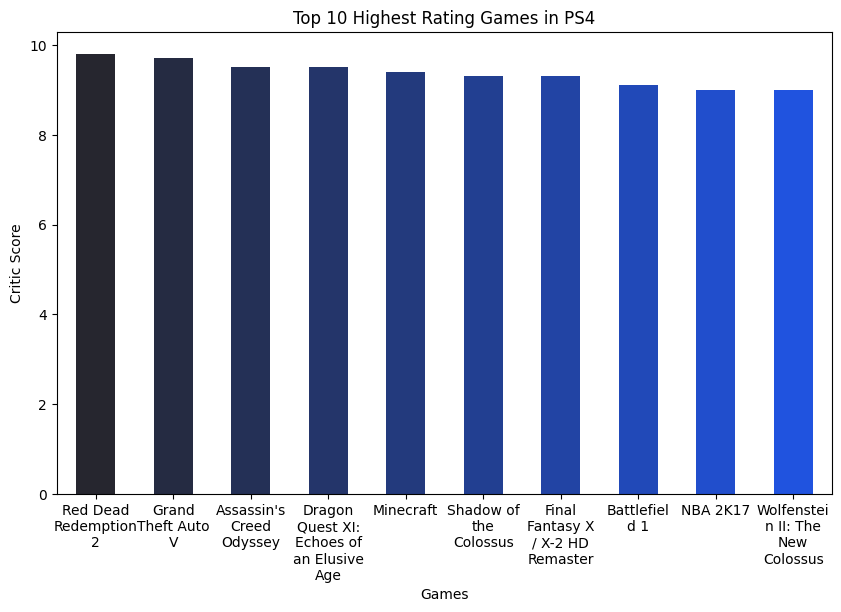

<Figure size 640x480 with 0 Axes>

In [11]:
#graph for highest rating game in ps4
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(data = ps4_highest_rating_games, x = 'title', y = 'critic_score', width = .5, palette = 'dark:#0044FF', 
            hue = ps4_highest_rating_games.index , legend = False)
ax.set_xticks(range(len(ps4_highest_rating_games.title)))
labels = ax.get_xticklabels()
wrapped_labels = [textwrap.fill(label.get_text(), width =10) for label in labels]
plt.title("Top 10 Highest Rating Games in PS4")
plt.xlabel("Games")

ax.set_xticklabels(wrapped_labels)
plt.ylabel("Critic Score")
plt.tight_layout
plt.savefig('highest_rating_game_ps4.png')
plt.show()
plt.clf()

In [12]:
#new df with xOne game sales
x_game_sales = psx_game_sales[psx_game_sales.console == 'XOne'].reset_index(drop = True)
x_game_sales = x_game_sales.drop(columns = ['index'])

In [13]:
#top 10 highest rating games in XOne
x_highest_rating_games = x_game_sales.nlargest(10, 'critic_score').reset_index(drop = True)
x_highest_rating_games.head(10)

,title,console,genre,publisher,developer,critic_score,total_sales,north_america,japan,ea,other_sales,release_date,last_update,year,month,date
0,Battlefield 1,XOne,Shooter,Electronic Arts,EA DICE,9.3,5.13,3.37,0.02,1.26,0.48,2016-10-21,2018-03-24,2016,10,21
1,Forza Horizon 4,XOne,Racing,Microsoft Studios,Playground Games,9.2,1.84,0.74,0.01,0.95,0.15,2018-10-02,2018-10-01,2018,10,02
2,Grand Theft Auto V,XOne,Action,Rockstar Games,Rockstar North,9.0,8.72,4.70,0.01,3.25,0.76,2014-11-18,2018-04-11,2014,11,18
3,Forza Motorsport 7,XOne,Racing,Microsoft Studios,Turn 10 Studios,8.9,1.52,0.58,0.01,0.81,0.12,2017-10-03,2018-01-12,2017,10,03
4,Halo: The Master Chief Collection,XOne,Shooter,Microsoft Studios,343 Industries,8.8,3.44,2.06,0.03,1.04,0.31,2014-11-11,2018-03-24,2014,11,11
5,Far Cry 4,XOne,Shooter,Ubisoft,Ubisoft Montreal,8.5,1.68,0.85,0.02,0.68,0.14,2014-11-18,2018-01-23,2014,11,18
6,Fallout 4,XOne,Role-Playing,Bethesda Softworks,Bethesda Game Studios,8.4,5.03,2.94,0.02,1.62,0.45,2015-11-10,2018-03-24,2015,11,10
7,Call of Duty: Advanced Warfare,XOne,Shooter,Activision,Sledgehammer Games,8.3,5.22,3.25,0.01,1.49,0.48,2014-11-04,2018-01-01,2014,11,04
8,Call of Duty: Black Ops 3,XOne,Shooter,Activision,Treyarch,8.0,7.37,4.63,0.02,2.04,0.68,2015-11-06,2018-01-14,2015,11,06
9,Assassin's Creed: Unity,XOne,Action,Ubisoft,Ubisoft Montreal,8.0,3.58,2.34,0.00,0.90,0.34,2014-11-11,2018-05-04,2014,11,11


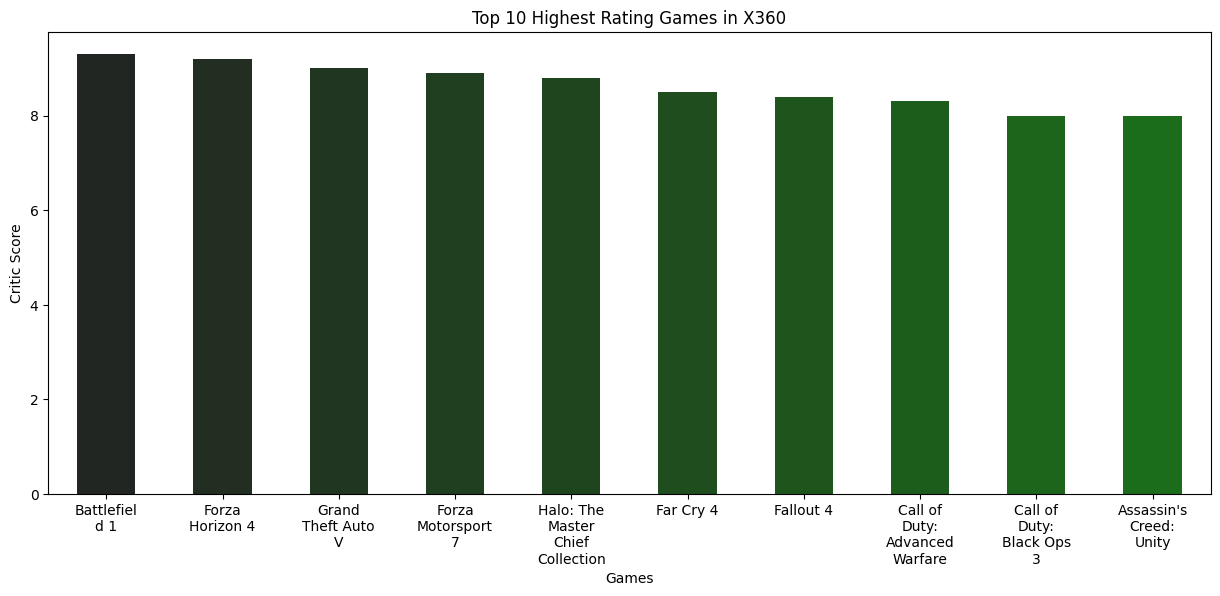

<Figure size 640x480 with 0 Axes>

In [14]:
#barplot top 10 highest rating games in XOne
fig, ax = plt.subplots(figsize = (15,6))
sns.barplot(x = 'title', y = 'critic_score', data = x_highest_rating_games, 
            width = .5, palette='dark:#0e7a0d' , hue = x_highest_rating_games.index, legend = False)
ax.set_xticks(range(len(x_highest_rating_games.title)))
labels = ax.get_xticklabels()
wrapped_labels = [textwrap.fill(label.get_text(), width =10) for label in labels]
ax.set_xticklabels(wrapped_labels)
plt.title('Top 10 Highest Rating Games in X360')
plt.xlabel("Games")
plt.ylabel("Critic Score")
plt.savefig('highest_rating_game_xone.png')
plt.show()
plt.clf()


### Most Popular Genre

In [15]:
#most popular genre ps4
ps4_popular_genre = ps4_game_sales.genre.value_counts()
ps4_popular_genre.head()

genre
Action              53
Shooter             40
Role-Playing        36
Action-Adventure    24
Sports              20
Name: count, dtype: int64

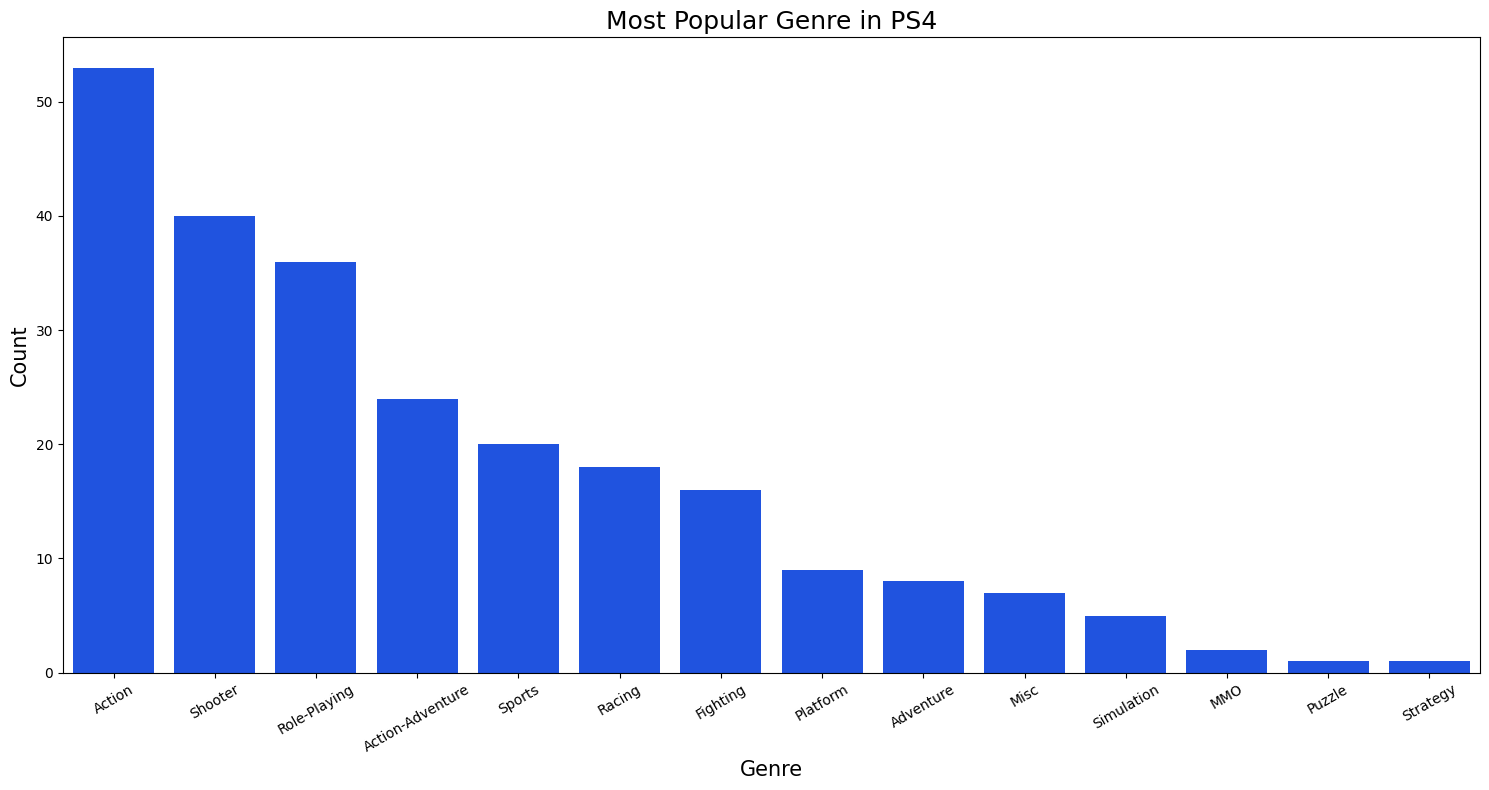

<Figure size 640x480 with 0 Axes>

In [16]:
#barplot most popular genre ps4
fig = plt.figure(figsize = (15,8))
sns.barplot(data=ps4_popular_genre, color = "#0044FF")
plt.title("Most Popular Genre in PS4", fontsize = 18)
plt.xlabel("Genre", fontsize = 15)
plt.xticks(rotation = 30)
plt.ylabel("Count",fontsize = 15)
plt.tight_layout()
plt.savefig('popular_genre_ps4.png')
plt.show()
plt.clf()

In [17]:
#XOne most popular genre
x_popular_genre = x_game_sales.genre.value_counts()
x_popular_genre

genre
Shooter             9
Action              7
Racing              4
Role-Playing        3
Misc                2
Sports              1
Action-Adventure    1
Fighting            1
Name: count, dtype: int64

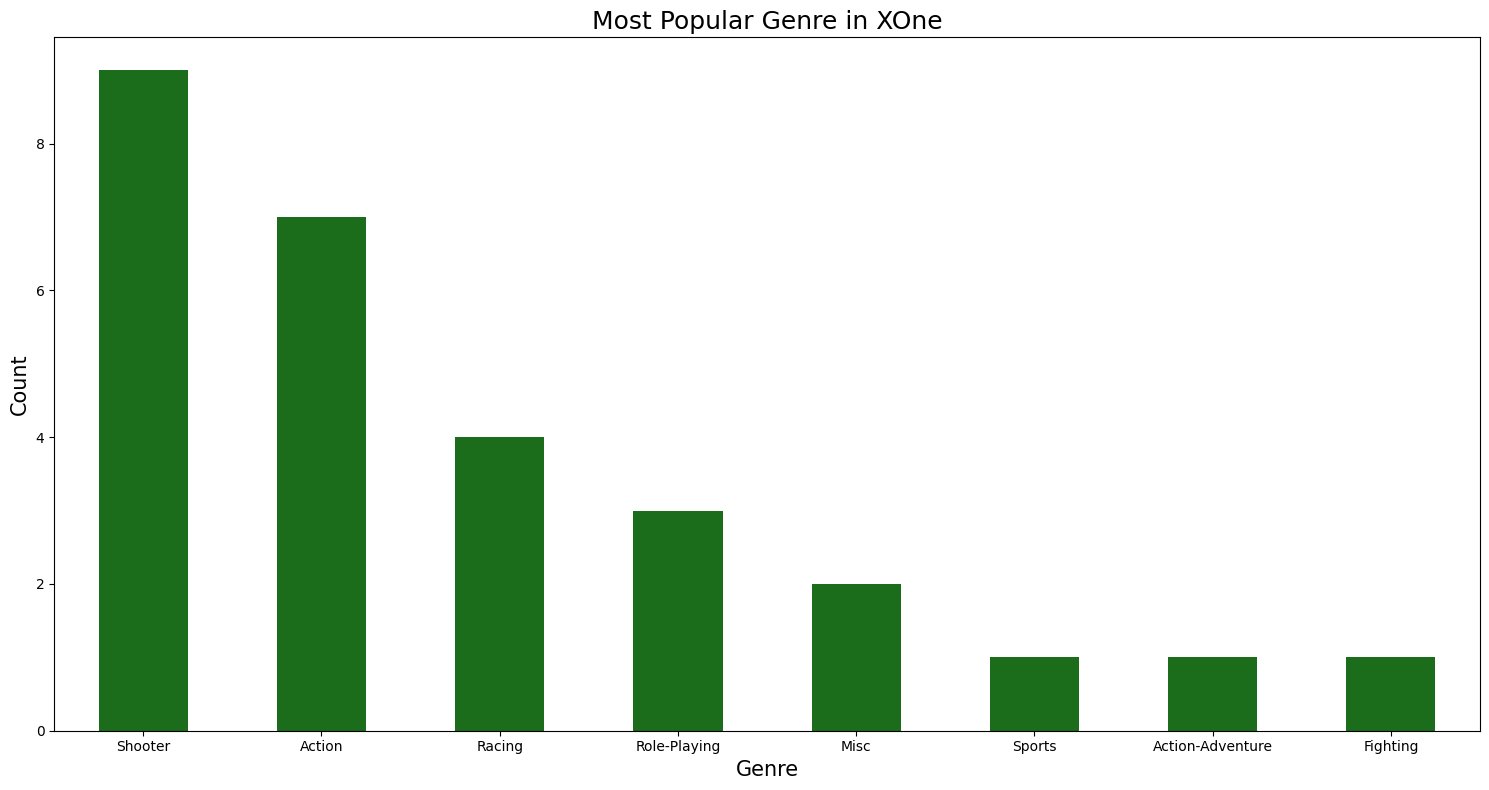

<Figure size 640x480 with 0 Axes>

In [18]:
#Barplot XOne most popular genre
plt.figure(figsize = (15,8))
sns.barplot(data = x_popular_genre, color = '#0e7a0d', width = .5)
plt.title("Most Popular Genre in XOne", fontsize = 18)
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.tight_layout()
plt.savefig('popular_genre_xone.png')
plt.show()
plt.clf()


### Sales Trend Over the Years

In [19]:
#sales trend over the year for ps4 games 
ps4_sales_trend = ps4_game_sales.groupby('year')[['total_sales']].sum()
ps4_sales_trend.head()

,total_sales
year,
2013,20.35
2014,83.81
2015,86.21
2016,88.72
2017,80.57


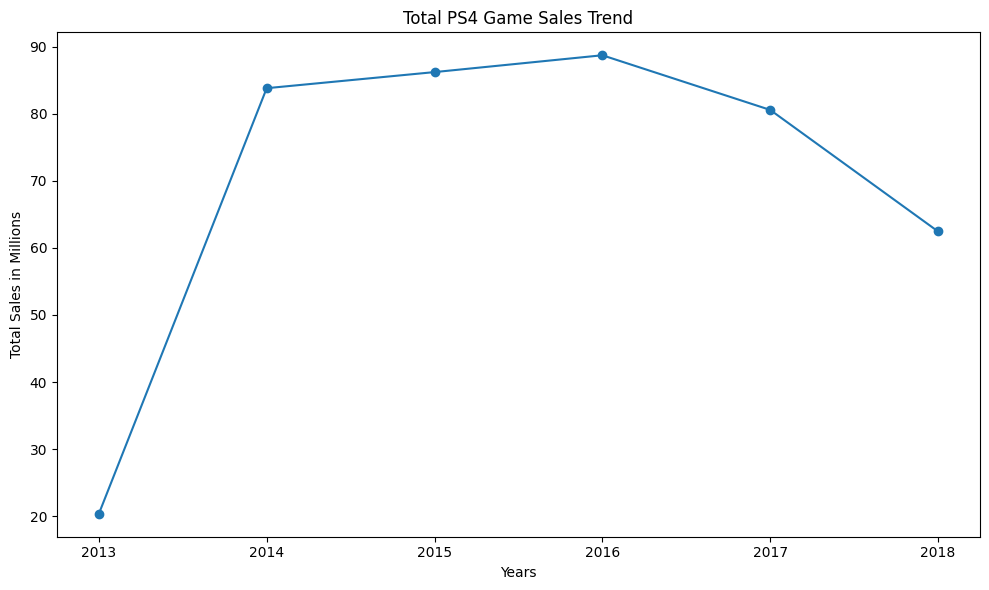

<Figure size 640x480 with 0 Axes>

In [20]:
#sales trend graph ps4 games
plt.figure(figsize = (10,6))
x_values = range(len(ps4_sales_trend))
years = ps4_game_sales.year.sort_values().unique()
ax = plt.subplot()
plt.plot(x_values, ps4_sales_trend.total_sales, marker = 'o')
plt.title("Total PS4 Game Sales Trend")
ax.set_xticks(x_values)
ax.set_xticklabels(years)
plt.xlabel("Years")
plt.ylabel("Total Sales in Millions")
plt.tight_layout()
plt.savefig('total_ps4_game_sales.png')
plt.show()
plt.clf()

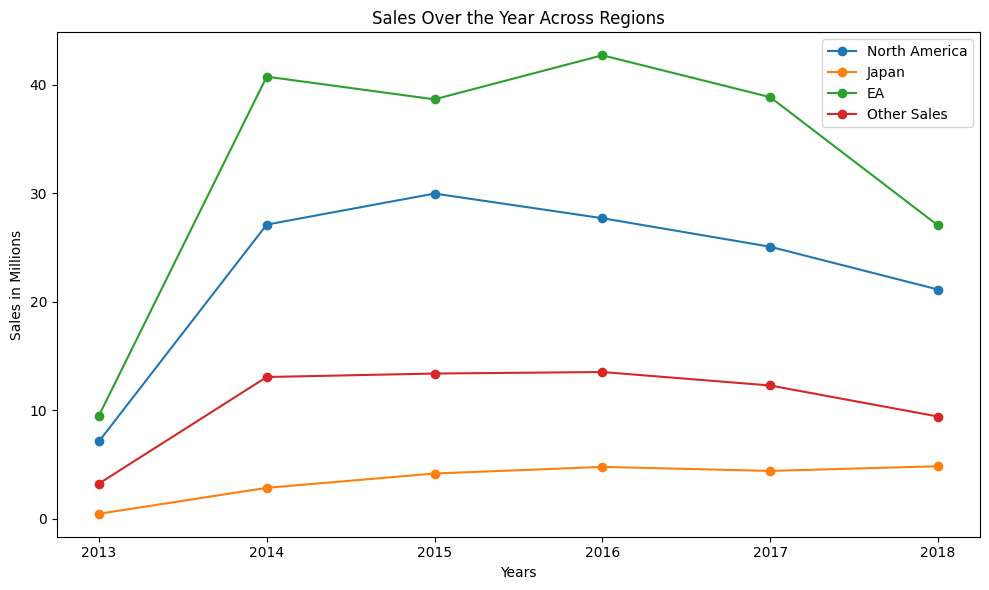

<Figure size 640x480 with 0 Axes>

In [21]:
#sales across multiple regions
plt.figure(figsize = (10,6))
sales = ps4_game_sales.groupby('year')[['north_america', 'japan', 'ea', 'other_sales']].sum()
ax= plt.subplot()
plt.plot(sales, marker= 'o')
plt.title("Sales Over the Year Across Regions")
plt.xlabel("Years")
plt.ylabel("Sales in Millions")
plt.legend(labels=['North America', 'Japan', 'EA', 'Other Sales'])
plt.tight_layout()
plt.savefig('sales_across_region.png')
plt.show()
plt.clf()

In [22]:
sales

,north_america,japan,ea,other_sales
year,,,,
2013,7.13,0.47,9.50,3.25
2014,27.11,2.86,40.74,13.07
2015,29.97,4.18,38.65,13.39
2016,27.70,4.79,42.71,13.53
2017,25.07,4.42,38.85,12.29
2018,21.13,4.85,27.03,9.43


# Conclusion
Throughout this project I was able to make various analysis and create visualization to uncover patterns and better understanding of the data. The goal of this project was to answer the following questions:

- What are the top 10 Video Game Sales based on critic score?
  - From the graph in **Top 10 Highest Rating Games** it can seen that all of the top 10 games have ratings of over 9 for PS4 games and over 8 for XOne. Addtionally there are only few games like `Battelfield 1`, `Assasins Creed`, and `Grand Theft Auto V` that are common in both consoles. This could be because the some games are only released for one type of console which is very common in this industry. For example Halo is only available to play in Xbox consoles.
- What are the top-selling game genres for PS4 and XOne gloabally?
  - The highest-selling games for both consoles appear to belong primarily to the Action and Shooter genrese. However the dataset for the XOne is considearbly smaller compared to that of the PS4, which may introduce bias into the analysis. Given the limited representation of XOne titles and the insufficent data to support a robust comparative study, the subsequent analysis in this project will focus exclusively on PS4 games.
- Which region contributes the most to global sales?
  - From the Sales Trend Analysis it can be concluded `Europe and Africa (EA)` contribuest most to the global sales of PS4 video games and surprisingly `Japan` seems to have the lowest contribution. 
- Which year saw the highest and lowest sales volumes?
  - `Total PS4 Game Sales Trend` graph indicates a substantial increase in game sale towards the end of 2013, likely because of PS4 console release in November 2013. Following this surge, sales exhibited a steady yet gradual upward trend, culmunating in 2016, which recorded the highest sales volumn at approximately 90 million dollars sales. In contrast, early 2013 reflects the lowest sales volumme, roughly at 7.13 million dollars. 